In [1]:
import numpy as np
import cv2

from feature_tracker import FeatureTrackerTypes, FeatureTracker, FeatureTrackingResult
from feature_orb2D import OrbFeature2D
from feature_matcher import feature_matcher_factory, FeatureMatcherTypes
from parameters import Parameters 
import random
import tracemalloc
import linecache
from visual_odometry import ImageRecievedState, VisualOdometry
from camera import KinectCamera
from utils import compute_euler_angle

In [2]:
import time

In [3]:
MinNumFeatureDefault = Parameters.MinNumFeatureDefault
RatioTest = Parameters.FeatureMatchRatioTest
t = np.load("100/0/translations.npy")
r = np.load("100/0/rotations.npy")

width  = 640
height = 480
fx     = 554.254691191187
fy     = 554.254691191187
cx     = 320.5
cy     = 240.5
D      = [0.0, 0.0, 0.0, 0.0, 0.0] 

cam = KinectCamera(width, height, fx, fy, cx, cy, D)

feature_tracker = FeatureTracker(num_features=MinNumFeatureDefault, 
                       num_levels = 8,  
                       scale_factor = 1.2,   
                       match_ratio_test = RatioTest, 
                       tracker_type = FeatureTrackerTypes.DES_BF)

Using Orb Feature 2D


In [4]:
vo = VisualOdometry(cam, feature_tracker, t, r)

In [30]:
path = "100/image_85.jpg"
img = cv2.imread(path)
vo.trackImage(img)

processing first frame


In [ ]:
path = "100/image_86.jpg"
img = cv2.imread(path)
vo.trackImage(img)

In [5]:

start = time.time()
for i in range(55):
    print(i)
    path = "100/image_"+str(i)+".jpg"
    img = cv2.imread(path)
    if img is not None:
        vo.trackImage(img, i)
    else: print("image is not read")
end = time.time()

print("time elapsed: ", end-start)
    

0
processing first frame
1
processing second frame
# matched points:  523 , # inliers:  259
2
processing second frame
# matched points:  493 , # inliers:  272
3
processing second frame
# matched points:  522 , # inliers:  326
4
processing second frame
# matched points:  496 , # inliers:  287
5
processing second frame
# matched points:  486 , # inliers:  208
6
processing second frame
# matched points:  409 , # inliers:  146
7
processing second frame
# matched points:  381 , # inliers:  149
8
processing second frame
# matched points:  365 , # inliers:  159
9
processing second frame
# matched points:  348 , # inliers:  176
10
processing second frame
# matched points:  325 , # inliers:  127
11
processing second frame
# matched points:  336 , # inliers:  118
12
processing second frame
# matched points:  279 , # inliers:  92
13
processing second frame
# matched points:  304 , # inliers:  113
14
processing second frame
# matched points:  279 , # inliers:  114
15
processing second frame
# matc

In [6]:
p = vo.trans_est_ref

In [7]:
p = np.reshape(p, (54,3))

In [8]:
p=np.round(p,2)

In [29]:
p=p/10

In [30]:
t_xzy = []

for i in range(len(t)):
    t_xzy.append([t[i][0],t[i][2],t[i][1]])

In [31]:
t_xzy = np.round(t_xzy,2)
t_xzy[:54]

array([[-1.38,  0.  ,  1.79],
       [-1.38,  0.  ,  1.77],
       [-1.38,  0.  ,  1.74],
       [-1.39,  0.  ,  1.72],
       [-1.39,  0.  ,  1.69],
       [-1.39,  0.  ,  1.66],
       [-1.4 ,  0.  ,  1.61],
       [-1.4 ,  0.  ,  1.57],
       [-1.41,  0.  ,  1.52],
       [-1.42,  0.  ,  1.46],
       [-1.42,  0.  ,  1.39],
       [-1.43,  0.  ,  1.32],
       [-1.44,  0.  ,  1.23],
       [-1.45,  0.  ,  1.16],
       [-1.46,  0.  ,  1.08],
       [-1.47,  0.  ,  1.01],
       [-1.48,  0.  ,  0.93],
       [-1.48,  0.  ,  0.86],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.49,  0.  ,  0.8 ],
       [-1.47,  0.  ,  0.8 ],
       [-1.45,  0.  ,  0.8 ],
       [-1

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = []
y = []

for i in range(54):
    x.append(p[i][0])
    y.append(p[i][2])
    

In [41]:
xn = []
yn = []

for i in range(54):
    xn.append(((p[i][0])+(t_xzy[i][0]*(-1)+1.379))/2)
    yn.append(((p[i][2])+(t_xzy[i][2]*(-1)+1.793))/2)
    

In [43]:
x_t = []
y_t = []

for i in range(54):
    x_t.append(t_xzy[i][0]*(-1)+1.379)
    y_t.append(t_xzy[i][2]*(-1)+1.793)

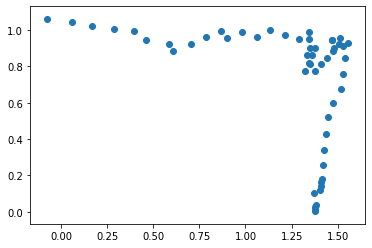

In [42]:
plt.scatter(xn, yn)
plt.show()

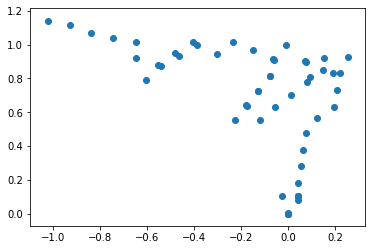

In [35]:
plt.scatter(x, y)
plt.show()

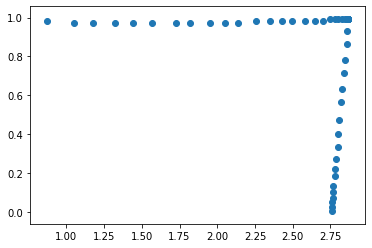

In [44]:
plt.scatter(x_t, y_t)
plt.show()

In [62]:
vo.kps_cur.shape

(94, 2)

In [17]:
x

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [16]:
def display_top(snapshot, key_type='lineno', limit=10):
    snapshot = snapshot.filter_traces((
        tracemalloc.Filter(False, "<frozen importlib._bootstrap>"),
        tracemalloc.Filter(False, "<unknown>"),
    ))
    top_stats = snapshot.statistics(key_type)

    print("Top %s lines" % limit)
    for index, stat in enumerate(top_stats[:limit], 1):
        frame = stat.traceback[0]
        print("#%s: %s:%s: %.1f KiB"
              % (index, frame.filename, frame.lineno, stat.size / 1024))
        line = linecache.getline(frame.filename, frame.lineno).strip()
        if line:
            print('    %s' % line)

    other = top_stats[limit:]
    if other:
        size = sum(stat.size for stat in other)
        print("%s other: %.1f KiB" % (len(other), size / 1024))
    total = sum(stat.size for stat in top_stats)
    print("Total allocated size: %.1f KiB" % (total / 1024))


In [16]:
vo.trans_est

array([[ 0.78281471],
       [-0.0212825 ],
       [ 0.62189081]])

In [15]:
cv2.imwrite("Images/current.jpg", img2)

True

In [17]:
print(vo.cur_R)

[[ 0.99959432  0.00204117  0.02840809]
 [-0.00209109  0.99999632  0.00172741]
 [-0.02840446 -0.00178611  0.99959492]]


In [11]:
print(vo.cur_t)

[[ 0.78281471]
 [-0.0212825 ]
 [ 0.62189081]]


In [64]:
a,b = None, None

In [21]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])]]

In [32]:
compute_euler_angle(vo.cur_R)

array([-0.00492516,  0.0938872 , -0.01327321])

In [12]:
vo.trackImage(image_2)

processing second frame
# matched points:  55 , # inliers:  19


In [13]:
img2 = vo.draw_img
cv2.imwrite("Images/res/image2.jpg", img2)

True

In [16]:
vo.cur_t

array([[1.18445052],
       [0.05603373],
       [1.53442075]])

In [19]:
vo.poses[0]

array([[ 0.99959432,  0.00204117,  0.02840809,  0.        ],
       [-0.00209109,  0.99999632,  0.00172741,  0.        ],
       [-0.02840446, -0.00178611,  0.99959492,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [20]:
vo.poses[1]

array([[ 9.98023904e-01, -3.12445700e-04,  6.28346193e-02,
         4.01635806e-01],
       [ 9.73925527e-04,  9.99944431e-01, -1.04969621e-02,
         7.73162345e-02],
       [-6.28278480e-02,  1.05374154e-02,  9.97968749e-01,
         9.12529933e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [26]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])],
 [array([0.40163581]), array([0.07731623]), array([0.91252993])]]

In [22]:
vo.cur_t

array([[1.18445052],
       [0.05603373],
       [1.53442075]])

In [23]:
vo.cur_R

array([[ 9.98023904e-01, -3.12445700e-04,  6.28346193e-02],
       [ 9.73925527e-04,  9.99944431e-01, -1.04969621e-02],
       [-6.28278480e-02,  1.05374154e-02,  9.97968749e-01]])

In [27]:
vo.trackImage(image_3)

processing second frame
# matched points:  50 , # inliers:  15


In [28]:
img2 = vo.draw_img
cv2.imwrite("Images/res/image2.jpg", img2)

True

In [29]:
vo.trans_est_ref

[[array([0.]), array([0.]), array([0.])],
 [array([0.40163581]), array([0.07731623]), array([0.91252993])],
 [array([0.95375506]), array([-0.00526277]), array([1.74219555])]]

In [30]:
vo.cur_t

array([[ 1.73656977],
       [-0.02654527],
       [ 2.36408636]])

In [31]:
vo.cur_R

array([[ 0.99550813,  0.01321437,  0.09374933],
       [-0.01373435,  0.99989366,  0.00490345],
       [-0.09367457, -0.00616901,  0.99558376]])

In [34]:
img3 = vo.draw_img
cv2.imwrite("Images/res/image3.jpg", img3)

True

In [65]:
r

array([[-0.   , -0.   , -1.678],
       [-0.   , -0.   , -1.679],
       [-0.   , -0.   , -1.68 ],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.682],
       [-0.   , -0.   , -1.68 ],
       [-0.   , -0.   , -1.677],
       [-0.   , -0.   , -1.679],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.681],
       [-0.   , -0.   , -1.683],
       [-0.   , -0.   , -1.685],
       [-0.   , -0.   , -1.687],
       [-0.   , -0.   , -1.689],
       [-0.   , -0.   , -1.691],
       [-0.   , -0.   , -1.694],
       [-0.   , -0.   , -1.695],
       [-0.   , -0.   , -1.696],
       [-0.   , -0.   , -1.651],
       [-0.   , -0.   , -1.466],
       [-0.   , -0.   , -1.304],
       [-0.   , -0.   , -1.136],
       [-0.   , -0.   , -0.961],
       [-0.   , -0.   , -0.806],
       [-0.   , -0.   , -0.634],
       [-0.   , -0.   , -0.472],
       [-0.   , -0.   , -0.31 ],
       [-0.   , -0.   , -0.182],
       [ 0.   , -0.   ,  0.018],
       [ 0